In [1]:
from google.colab import files
uploaded = files.upload()


Saving student_feedback.xlsx to student_feedback.xlsx


In [2]:
import pandas as pd

filename = list(uploaded.keys())[0]
df = pd.read_excel(filename)

# Show first rows and column names
print(df.columns)
df.head()


Index(['Unnamed: 0', 'Student ID', 'Well versed with the subject',
       'Explains concepts in an understandable way', 'Use of presentations',
       'Degree of difficulty of assignments', 'Solves doubts willingly',
       'Structuring of the course',
       'Provides support for students going above and beyond',
       'Course recommendation based on relevance'],
      dtype='object')


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [3]:
# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'Student ID'])

# Check for missing data
print("Missing values:\n", df.isnull().sum())


Missing values:
 Well versed with the subject                            0
Explains concepts in an understandable way              0
Use of presentations                                    0
Degree of difficulty of assignments                     0
Solves doubts willingly                                 0
Structuring of the course                               0
Provides support for students going above and beyond    0
Course recommendation based on relevance                0
dtype: int64


In [4]:
category_averages = df.mean().sort_values(ascending=False)
category_averages


,0
Well versed with the subject,7.497502
Explains concepts in an understandable way,6.081918
Use of presentations,5.942058
Provides support for students going above and beyond,5.662338
Structuring of the course,5.636364
Course recommendation based on relevance,5.598402
Solves doubts willingly,5.474525
Degree of difficulty of assignments,5.430569


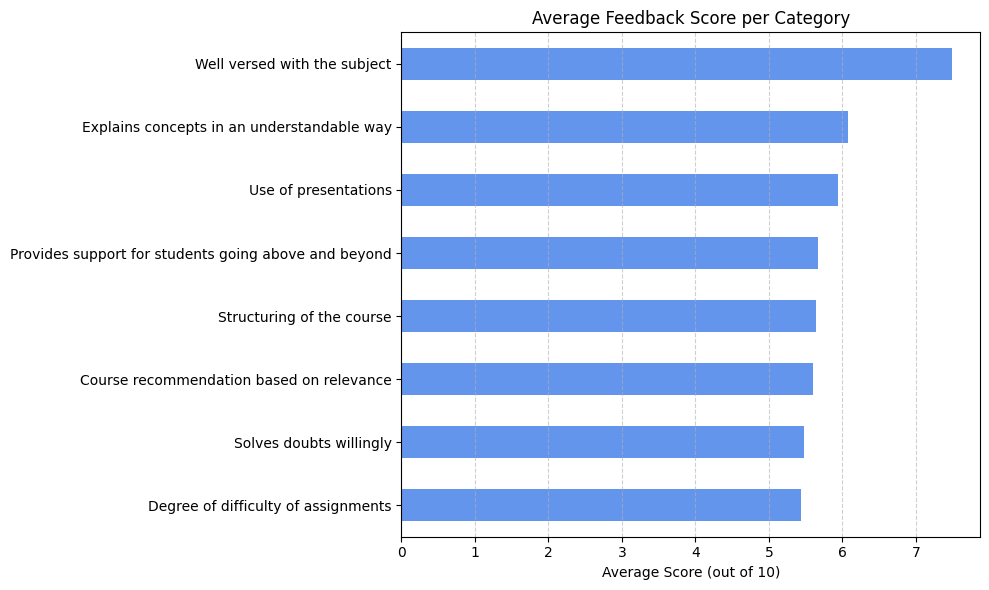

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
category_averages.plot(kind='barh', color='cornflowerblue')
plt.title('Average Feedback Score per Category')
plt.xlabel('Average Score (out of 10)')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


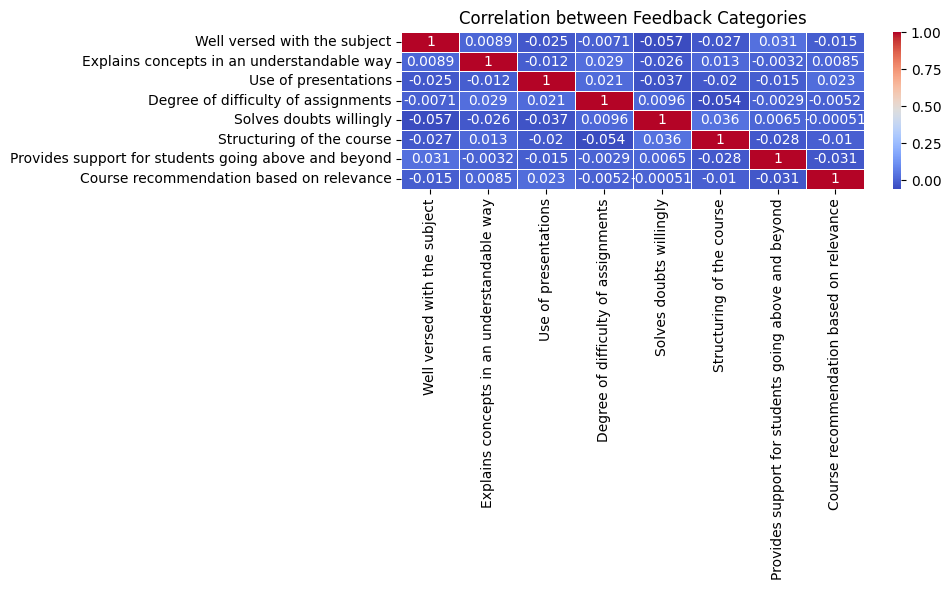

In [6]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation between Feedback Categories")
plt.tight_layout()
plt.show()


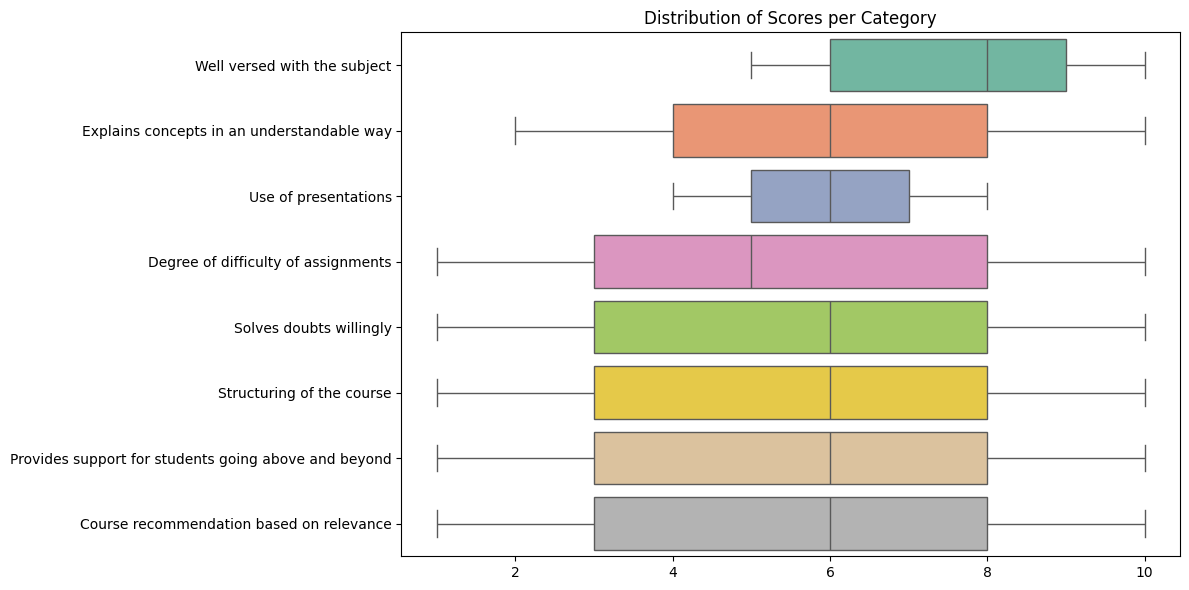

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Distribution of Scores per Category")
plt.tight_layout()
plt.show()


In [8]:
ranked = category_averages.reset_index()
ranked.columns = ['Feedback Category', 'Average Score']
ranked['Rank'] = ranked['Average Score'].rank(ascending=False).astype(int)
ranked.sort_values('Rank')


,Feedback Category,Average Score,Rank
0,Well versed with the subject,7.497502,1
1,Explains concepts in an understandable way,6.081918,2
2,Use of presentations,5.942058,3
3,Provides support for students going above and ...,5.662338,4
4,Structuring of the course,5.636364,5
5,Course recommendation based on relevance,5.598402,6
6,Solves doubts willingly,5.474525,7
7,Degree of difficulty of assignments,5.430569,8
